<a href="https://colab.research.google.com/github/saurabh000007/Human-Activity-Recognition/blob/main/Human_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# retrieving data from test and train files
import pandas as pd

# Read the training data
file_X_train = '/content/drive/MyDrive/Human_Activity_Recognition/train/X_train.txt'
X_train = pd.read_csv(file_X_train, header=None, delim_whitespace=True)

# Read the training labels
file_y_train = '/content/drive/MyDrive/Human_Activity_Recognition/train/y_train.txt'
y_train = pd.read_csv(file_y_train, header=None)

# Read the test data
file_X_test = '/content/drive/MyDrive/Human_Activity_Recognition/test/X_test.txt'
X_test = pd.read_csv(file_X_test, header=None, delim_whitespace=True)

# Read the test labels
file_y_test = '/content/drive/MyDrive/Human_Activity_Recognition/test/y_test.txt'
y_test = pd.read_csv(file_y_test, header=None)

# Check shapes to verify loading
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

<ipython-input-11-5a299575ed0e>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(file_X_train, header=None, delim_whitespace=True)
<ipython-input-11-5a299575ed0e>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(file_X_test, header=None, delim_whitespace=True)


X_train shape: (7352, 561)
y_train shape: (7352, 1)
X_test shape: (2947, 561)
y_test shape: (2947, 1)


In [12]:
# analyzing data
print(X_train)

           0         1         2         3         4         5         6    \
0     0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1     0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2     0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3     0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4     0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   
...        ...       ...       ...       ...       ...       ...       ...   
7347  0.299665 -0.057193 -0.181233 -0.195387  0.039905  0.077078 -0.282301   
7348  0.273853 -0.007749 -0.147468 -0.235309  0.004816  0.059280 -0.322552   
7349  0.273387 -0.017011 -0.045022 -0.218218 -0.103822  0.274533 -0.304515   
7350  0.289654 -0.018843 -0.158281 -0.219139 -0.111412  0.268893 -0.310487   
7351  0.351503 -0.012423 -0.203867 -0.269270 -0.087212  0.177404 -0.377404   

           7         8         9    ...       551       552    

In [24]:

# function process_data to split the data through columns into float values
def process_data(df):
    data = []

    # Check if df is a DataFrame or NumPy array
    if hasattr(df, 'iloc'):  # It's a DataFrame
        for i in range(df.shape[0]):
            t = df.iloc[i]
            if isinstance(t[0], str):
                t = t[0].split()
            else:
                row_str = ' '.join(str(val) for val in t)
                t = row_str.split()

            z = [float(j) for j in t]
            data.append(z)
    else:  # It's a NumPy array or similar
        for i in range(len(df)):
            t = df[i]
            if isinstance(t, str) or (hasattr(t, '__len__') and isinstance(t[0], str)):
                if isinstance(t, str):
                    t = t.split()
                else:
                    t = t[0].split()
            else:
                # Convert the row to string
                row_str = ' '.join(str(val) for val in (t if hasattr(t, '__len__') else [t]))
                t = row_str.split()

            z = [float(j) for j in t]
            data.append(z)

    data = np.array(data)
    return data

In [25]:

# processing datas
X_train=process_data(X_train)
X_test=process_data(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)

In [26]:
print(X_train)

[[ 0.20064157 -0.0636826  -0.41962845 ... -0.68721921  0.40794614
  -0.00756789]
 [ 0.05594788  0.03148567 -0.25390836 ... -0.694138    0.40911698
   0.00787517]
 [ 0.07351535 -0.04341648 -0.07629468 ... -0.702239    0.4102883
   0.02650234]
 ...
 [-0.01566765  0.0167814   1.13222107 ... -0.56584847  0.64059683
   0.34870928]
 [ 0.21586648 -0.02812252 -0.86770988 ... -0.57766781  0.63147758
   0.29327564]
 [ 1.09620157  0.12919873 -1.67268082 ... -0.57392691  0.63274259
   0.33396081]]


In [27]:
print(X_train.shape)

(7352, 561)


In [28]:
# standardising datas..i.e mean=0 and variance=1
ss=StandardScaler().fit(X_train)
X_train=ss.transform(X_train)
X_test=ss.transform(X_test)

In [29]:
# making a copy of datas X_tr and X_te having no of components reduced to 2
model1=PCA(n_components=2,whiten=True)
X_tr=model1.fit_transform(X_train)
X_te=model1.transform(X_test)

In [33]:

# functions for visualizing X_tr and X_te
def legend():
    d={}
    d[1]='cyan'
    d[2]='red'
    d[3]='yellow'
    d[4]='blue'
    d[5]='green'
    d[6]='purple'

    k={}
    file='/content/drive/MyDrive/Human_Activity_Recognition/activity_labels.txt'
    a=pd.read_csv(file,header=None)
    for i in range(a.shape[0]):
        t=a.iloc[i]
        t=t[0]
        t=t.split()
        x,y=t
        x=int(x)
        k[x]=y

    return d,k

In [34]:
def visualize(X_train,y_train):
    key,activity=legend()

    label_list=[]
    for i in range(1,7):
        x=mpatches.Patch(color=key[i], label=activity[i])
        label_list.append(x)

    for i in range(X_train.shape[0]):
        plt.scatter(X_train[i][1], X_train[i][0] , color=key[y_train[i]])

    plt.legend(handles=label_list)
    plt.show()


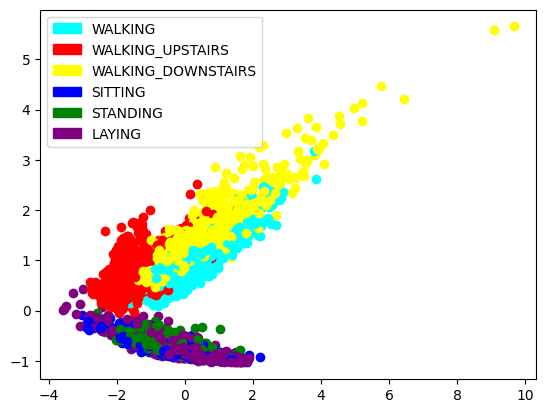

In [35]:
visualize(X_tr,y_train)

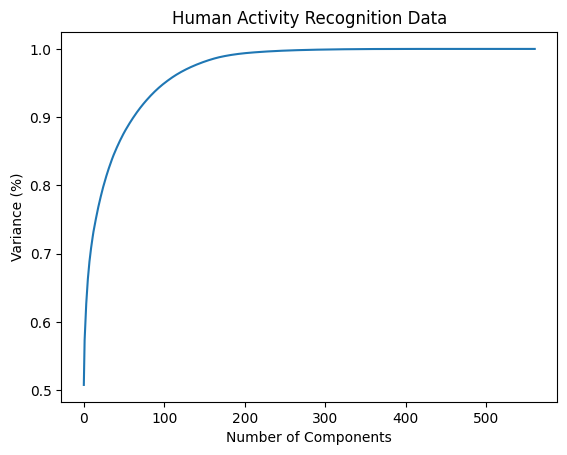

In [36]:
# now plotting no of components(int the dataset) vs variance to determine no of components for max accuracy
pca = PCA().fit(X_train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Human Activity Recognition Data')
plt.show()

In [37]:
# reducing the no of components to around 220 for max accuracy with less execution time
model=PCA(n_components=220,whiten=True)
X_train=model.fit_transform(X_train)
X_test=model.transform(X_test)

In [38]:

print(X_train.shape)

(7352, 220)


In [39]:
# splitting the training data to train and dev sets for lower execution time
X_train,X_dev,y_train,y_dev=train_test_split(X_train,y_train,test_size=0.3,random_state=0)

In [40]:

# training model on linear kernel svm and decision_function_shape=one vs one
model = svm.SVC(decision_function_shape='ovo',kernel='linear')
model.fit(X_train,y_train)

SVC(decision_function_shape='ovo', kernel='linear')

In [41]:
# statistical analysis
e_train=model.score(X_train,y_train)
e_dev=model.score(X_dev,y_dev)
e_test=model.score(X_test,y_test)
print('Training accuracy=',e_train)
print('Development accuracy=',e_dev)
print('Testing accuracy=',e_test)

Training accuracy= 0.9957248348231637
Development accuracy= 0.9818676337262012
Testing accuracy= 0.9596199524940617


In [42]:
print('confusion matrix for development set')
print(confusion_matrix(y_dev,model.predict(X_dev)))

confusion matrix for development set
[[361   0   0   0   0   0]
 [  0 315   0   0   0   0]
 [  1   0 279   0   0   0]
 [  0   0   0 386  20   0]
 [  0   0   0  17 392   0]
 [  0   0   0   2   0 433]]


In [43]:
print('confusion matrix for test set')
print(confusion_matrix(y_test,model.predict(X_test)))

confusion matrix for test set
[[493   3   0   0   0   0]
 [ 20 451   0   0   0   0]
 [  9   3 408   0   0   0]
 [  0   1   0 422  68   0]
 [  0   0   0  15 517   0]
 [  0   0   0   0   0 537]]
